## Jeffery Orbits

### Introduction

Demonstration of angle for ellipsoids tumbling in shear from using equations from Stover and Cohen (1990).  


<table>
    <!-- 
    <tr><td>
    <img src="Stover1990_Fig1.png" width="320"/>
    </td><td>
    <img src="Stover1990_Fig2.png" width="300"/>
    </td></tr> 
    -->
    <tr><td>
    <img src="https://docs.google.com/uc?export=download&id=1KdqU_9-pH5pCShPPZ6-rJJAeZaOFF_EX" width="320"/>
    </td><td>
    <img src="https://docs.google.com/uc?export=download&id=17MVbd4FUyr3VPgDOVhO52TMlpnkQgiSa" width="300"/>
    </td></tr>
    <tr><td colspan="2">Fig. 1 and Fig. 2 from Stover and Cohen (1990) showing the definition of the coodinate system and Jeffery orbits for different values of $C$</td></tr>
</table>

Tumble period $T$ depends on effective aspect ratio $r_e$ and shear rate $\dot\gamma$ as

$$
T = \frac{2\pi}{\dot\gamma}\left(r_e + \frac{1}{r_e}\right)
$$

For ellipsoids, $r_e$ is length/diameter.  For other particles it can be determined experimentally or by simulations, such as those in Ingber (1994).

From tumble rate we can get angle as a function of time as

$$
\tan \phi = r_e \tan\left(\frac{2\pi t}{T} + \kappa\right)
$$

and

$$
\tan \theta = \frac{C r_e}{\sqrt{r_e^2 \cos^2 \phi + \sin^2\phi}}
$$

where $\kappa$ is the phase angle determined from the initial orientation of the particle.

$C$ is the orbit constant which governs the evolution of $\theta$ and $\phi$ over time (Fig. 2 above).  From Stover and Cohen (1990), "If Jeffery's assumptions are not violated, the value of $C$ is constant and the particle follows one of these trajectories indefinitely. $C$ is zero when the particle is permanently aligned with the vorticity axis and infinity when the particle lies in the $x$-$y$ plane."

A full treatment requires acknowledging wall effects, particle inertia, medium viscosity, particle interactions, *etc.*, but in the idealized world of the dilute limit we will ignore these.


### References

[Stover1990]: Stover, C.A., Cohen, C., 1990. *The motion of rodlike particles in the pressure-driven flow between two flat plates.* Rheologica Acta **29**, 192–203. https://doi.org/10.1007/BF01331355

[Ingber1994]: Ingber, M.S., Mondy, L.A., 1994. *A numerical study of three‐dimensional Jeffery orbits in shear flow.* Journal of Rheology **38**, 1829–1843. https://doi.org/10.1122/1.550604

[Jeffery1922]: Jeffery, G.B., 1922. *The Motion of Ellipsoidal Particles Immersed in a Viscous Fluid.* Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences **102**, 161–179. https://doi.org/10.1098/rspa.1922.0078

In [0]:
import matplotlib
import numpy as np
from numpy import pi, sin, cos, tan, arctan, arctan2, sqrt, unwrap, degrees, radians
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def jeffery(t, re, shear, C=1, phase=0, t_is_norm=True):
    T = 2*pi/shear*(re + 1./re)
    if t_is_norm:
        t_norm, t = t, t*T
    else:
        t_norm, t = t/T, t
    x = 2*pi*t_norm + phase
    phi = arctan(re*tan(x))
    theta = arctan(C*re/sqrt(re**2*cos(phi)**2 + sin(phi)**2))
    #theta = arctan(C*sqrt(re**2*sin(x)**2 + cos(x)**2))
    #phi, theta = degrees(unwrap(phi)), degrees(unwrap(theta))
    return t, phi, theta

### Evolution of Jeffrey orbits

Twiddle orbit constant ```C``` = $C$, ```phase``` = $\kappa$, aspect ratio ```re``` = $r_e$ and ```shear``` = $\dot\gamma$ below.  Using normalized time, ```t_over_T```, we can specify the number of periods to plot.  If using just time then it is harder to see that line shape depends only on aspect ratio.

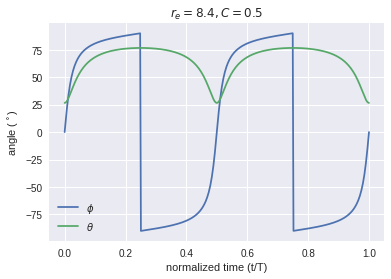

In [4]:
t_over_T = np.linspace(0, 1, 400)
C = 0.5
phase = 0.
re = 8.4
shear = 30
t_s, phi, theta = jeffery(t_over_T, re, shear, C=C, phase=radians(phase))
t = t_over_T if 1 else t_s    
plt.plot(t, degrees(phi), label=r'$\phi$')
plt.plot(t, degrees(theta), label=r'$\theta$')
if t is t_over_T:
    plt.xlabel('normalized time (t/T)')
else:
    plt.xlabel(r'time (s)')
plt.ylabel(r'angle ($ ^\circ$)')
plt.title(r'$r_e = %g, C = %g$'%(re, C))
plt.legend()


### Simulation of $\theta_d$ and $\phi_d$ distribution

Generate an initial population of $\theta$ and $\phi$ with equal probability in each direction.  In practice, this means that small values of $\theta$ will be rare because the line of latitude near the pole is short.  Use $\arccos(U[-1,1])$ where $U[-1,1]$ is the uniform distribution over $[-1, 1]$.  This does covers a half circle corresponding to lines of latitude.
$\phi$ is uniform over the lines of latitude.

Next find $C$ and $\kappa$ from $\theta$ and $\phi$ assuming we are at time $t=0$.  This is a simple inversion of the $\tan \phi$ and $\tan \theta$ expressions above.  Note that $C$ will be negative for $\theta < 0$.

Now forward propagate the system to random time $t$, unifomly covering some multiple of the period.   Can't use a fixed time $t$ since $t$ reverts to its original scrambled state every period.  In practice, there will be random phase shifts over time (and switching to neighbouring $C$ orbits) so the time average should be a reasonable representation.   Besides, except for extremely long periods our measurement should be the time average of the system, and so it doesn't matter where each particle is along its orbit, just the distribution of orbits.

Histogram the population of the forward propagated $\theta$ and $\phi$ showing both correlation and independent histograms.  As we see below, regardless of what $r_e$ we select we still get $\theta$ and $\phi$ acting independently.

Note that the histograms from the simulation represent the true weights of $theta$ and $phi$.  When using this within *sasmodels*, which does a correction for latitude in the distribution, need to set $\theta_d = (90-\theta)$ and modify the weight of the $\Delta\theta_d$ distribution by $1/\cos(\theta_d)$ compared to whatever analytic form the distributions below exhibit.

The plots below use $\phi$ instead of $\phi_d$ to show that there is a $90^\circ$ shift when the long axis switches between polar and equatorial radius and $\theta_d$ instead of $\theta$ because $\theta = 0^\circ$ is perpendicular to the flow in this coordinate system, and it makes the plots confusing having $P(\theta) = 0$ at the center.  The preferred orientation for theta is along the flow regardless of aspect ratio.

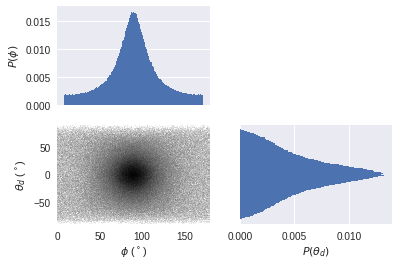

In [235]:
re = 3
n_pop = 1000000
theta_pop = np.arccos(np.random.rand(n_pop)*2-1)
phi_pop = np.random.rand(n_pop)*2*pi
C_pop = tan(theta_pop)*sqrt(cos(phi_pop)**2 + sin(phi_pop)**2/re**2)
k_pop = arctan(tan(phi_pop)/re)
t_pop = np.random.rand(n_pop)
#_ = plt.hist(np.log10(C_pop), bins=200, density=True)
#_ = plt.hist(k_pop, bins=200, density=True)
t, phi_next, theta_next = jeffery(t_pop, re, shear=1, C=C_pop, phase=k_pop)
if re >= 1: phi_next[phi_next<0]+=pi # phase unwrap
#if re >= 1: phi_next -= pi/2  # phi => phi_d
theta_next = pi/2 - theta_next  # theta => theta_d
theta_next[theta_next >= pi/2] -= pi # phase unwrap
weights = np.ones_like(theta_next)#/cos(theta_next)
plt.subplot(221)
plt.hist(degrees(phi_next), bins=200, density=True, weights=weights)
plt.xticks([])
plt.ylabel(r'$P(\phi)$')
plt.subplot(224)
plt.hist(degrees(theta_next), bins=200, density=True, weights=weights, orientation='horizontal')
plt.yticks([])
plt.xlabel(r'$P(\theta_d)$')
plt.subplot(223)
# Use log density to show more detail
from matplotlib import colors
plt.hist2d(degrees(phi_next), degrees(theta_next), bins=200, weights=weights, norm=colors.LogNorm())
#plt.xlabel(r'$\phi_d$ for $\phi$ = %d ($^\circ$)'%(90 if re > 1.0 else 0))
plt.xlabel(r'$\phi$ ($^\circ$)')
plt.ylabel(r'$\theta_d$ ($^\circ$)')
_ = None


### Analytic forms for $\Delta\theta_d$ and $\Delta\phi_d$

**Work in Progress: This section is incomplete and incorrect.**  

See simulation cell below for the empirical forms of the distribution.

In order to develop a orientation distribution for use with *sasmodels*, assume we start with a set of particles in random orientation. The scattering pattern is integrating over the population of particles over time, so we need a distribution that captures the proportion of time spent at each orientation.  From Fig 2 in Stover and Cohen (1990), we can assume that each initial orientation will determine a unique $C$ and $\kappa$ pair, with $C$ remaining constant and $\kappa$ moving along the orbit as the system evolves.


We can ignore the initial phase $\kappa$ since it only serves to shift the curves uniformly, and will vanish in the integration. So we need to determine the distribution of $C$ values from the initial orientation and for each $C$, determine the joint distribution of $\theta$ and $\phi$, then marginalize.  That is, find the form of $P(\theta, \phi, C)$ then integrate to get $P(\theta) = \int_{\phi, C} P(\theta | \phi, C) d\theta dC$ and $P(\phi) = \int_{\theta, C} P(\phi | \theta, C) d\phi dC$.  Should cross check by random sampling of evolved systems, and verify that $\int_C P(\theta, \phi | C) dC$ is separable.

Using

$$ \frac{d}{dy} f^{-1}(y)\Big|_{y=y_o} = \left(\frac{d}{dx}f(x)\right)^{-1}\Big|_{x=f^{-1}(y_o)}$$

density should be inversely related to the slope, so for $\phi$ with $x = \pi\,t/T \in [0, 1]$ covering $[-\pi/2, \pi/2]$ with

$$ \phi(x) = \tan^{-1}(r_e\tan(x))$$

then

$$
\frac{d\phi}{dx} = (r_e \sin^2(x) + (1/r_e)\cos^2(x))^{-1}
$$

and so

$$
\frac{dx}{d\phi} = r_e \sin^2(\phi) + (1/r_e)\cos^2(\phi)
$$

Normalize by the integral to make it into a probability

$$
\int_{-\pi/2}^{\pi/2} \frac{dx}{d\phi}\,d\phi = \tfrac{\pi}{2} (r_e + 1/r_e)
$$

Some more trig:

\begin{align}
\cos(\arctan(x)) &= 1\big/ \sqrt{1 + x^2} \\
\sin(\arctan(x)) &= x \big/ \sqrt{1 + x^2}
\end{align}

so

\begin{align}
\tan \theta &= \frac{C r_e}{\sqrt{r_e^2 \cos^2 \phi + \sin^2\phi}} \\
                   &= \frac{C r_e}{\sqrt{r_e^2 (1 + \tan^2 x)/(1 + r_e^2\tan^2 x)}} \\
                   &= C\sqrt\frac{1 + r_e^2\tan^2 x}{1 + \tan^2 x} \\
                   &= C\sqrt{r_e^2\sin^2 x + \cos^2 x}
{}\end{align}

and

$$
\frac{d\theta}{dx} = \frac{C\,(r_e^2 - 1)\,\sin x \cos x}{\sqrt{r_e^2\sin^2 x + \cos^2 x}\, 
(C^2 (r_e^2 \sin^2 x + \cos^2 x) + 1)}
$$


(0, 0.010955673858649729)

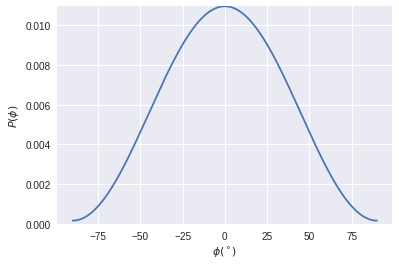

In [5]:
re=8.4
#re=1e10
phi = 180*t_over_T - 90
dx_dphi = re*sin(pi*t_over_T)**2 + cos(pi*t_over_T)**2/re
dx_dphi_norm = 90*(re+1/re)
p_phi = dx_dphi / dx_dphi_norm
plt.plot(phi, p_phi)
plt.xlabel(r'$\phi ( ^\circ)$')
plt.ylabel(r'$P(\phi)$')
plt.ylim([0, max(p_phi)])